In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('SORA.xlsx')  

In [3]:
df['SORA diff'] = df['SORA'] - df['SORA'].shift(1)

In [4]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['SORA'].dropna(), autolag = 'AIC')
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -0.46656156504905055
p-value: 0.8983782677080311


In [5]:
dftest = adfuller(df['SORA diff'].iloc[1:].dropna(), autolag = 'AIC')
print(f'ADF: {dftest[0]}')
print(f'p-value: {dftest[1]}')

ADF: -18.26417333447018
p-value: 2.327452821879314e-30


In [6]:
from pmdarima import auto_arima

In [7]:
stepwise_fit = auto_arima(df['SORA diff'].dropna(), trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-5257.282, Time=2.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4995.398, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4998.840, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5000.406, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4997.365, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5258.781, Time=2.62 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-5076.420, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5238.609, Time=1.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-5258.912, Time=2.61 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-5192.267, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-5261.139, Time=3.07 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-5305.681, Time=3.43 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-5257.690, Time=2.12 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-5262.883, Time=3.93 sec
 ARIMA(3,0,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4539
Model:               SARIMAX(5, 0, 5)   Log Likelihood                2687.550
Date:                Wed, 25 Oct 2023   AIC                          -5353.100
Time:                        11:08:26   BIC                          -5282.475
Sample:                             0   HQIC                         -5328.225
                               - 4539                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2049      0.085     -2.419      0.016      -0.371      -0.039
ar.L2         -0.1722      0.075     -2.304      0.021      -0.319      -0.026
ar.L3         -0.2032      0.076     -2.687      0.007      -0.351      -0.055
ar.L4          0.0710      0.077      0.917      0.359      -0.081       0.223
ar.L5          0.5798      0.062      9.357      0.000       0.458       0.701
ma.L1          0.0903      0.087      1.038      0.299      -0.080       0.261
ma.L2          0.0240      0.082      0.292      0.771      -0.138       0.186
ma.L3          0.0031      0.083      0.037      0.970      -0.159       0.165
ma.L4         -0.2178      0.078     -2.803      0.005      -0.370      -0.066
ma.L5         -0.6129      0.077     -7.988      0.000      -0.763      -0.463
sigma2         0.0179      0.000    120.117      0.000       0.018       0.018
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):             33474.98
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
print(df.shape)
train = df.iloc[:-880]
test = df.iloc[-880:]
print(train.shape, test.shape)

(4833, 4)
(3953, 4) (880, 4)


In [10]:
model = ARIMA(train['SORA diff'], order=(5,0,5))
model = model.fit()
model.summary()

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              SORA diff   No. Observations:                 3953
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2673.697
Date:                Wed, 25 Oct 2023   AIC                          -5323.393
Time:                        11:08:31   BIC                          -5248.006
Sample:                             0   HQIC                         -5296.654
                               - 3953                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.811      0.417      -0.001       0.001
ar.L1         -0.0972      0.556     -0.175      0.861      -1.187       0.993
ar.L2         -0.1211      0.449     -0.270      0.787      -1.001       0.758
ar.L3         -0.1603      0.465     -0.345      0.730      -1.071       0.750
ar.L4          0.1325      0.426      0.311      0.756      -0.702       0.967
ar.L5          0.3433      0.319      1.076      0.282      -0.282       0.968
ma.L1          0.0369      0.554      0.067      0.947      -1.049       1.123
ma.L2         -0.0504      0.470     -0.107      0.915      -0.971       0.870
ma.L3         -0.0566      0.471     -0.120      0.904      -0.979       0.866
ma.L4         -0.2848      0.381     -0.747      0.455      -1.031       0.462
ma.L5         -0.4055      0.348     -1.164      0.244      -1.088       0.277
sigma2         0.0151      0.000    103.281      0.000       0.015       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):             24738.30
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start, end = end, typ='levels')
pred.index = df.index[-880:]
print(pred)

3953    0.012447
3954    0.007404
3955    0.010406
3956    0.017929
3957    0.012519
          ...   
4828   -0.000432
4829   -0.000432
4830   -0.000432
4831   -0.000432
4832   -0.000432
Name: predicted_mean, Length: 880, dtype: float64


C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [12]:
model2 = ARIMA(df['SORA'], order=(5,0,5))
model2 = model2.fit()

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
index_future_dates = pd.date_range(start='2023-08-5', end='2025-12-31')
pred = model2.predict(start = len(df), end = len(df)+879, typ='levels').rename('SORA Predictions')
pred.index = index_future_dates

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [14]:
pred

2023-08-05    1.862180
2023-08-06    1.859050
2023-08-07    1.855930
2023-08-08    1.852822
2023-08-09    1.849725
                ...   
2025-12-27    1.027143
2025-12-28    1.027008
2025-12-29    1.026874
2025-12-30    1.026740
2025-12-31    1.026607
Freq: D, Name: SORA Predictions, Length: 880, dtype: float64

In [15]:
df3 = pred.to_frame()

<Axes: >

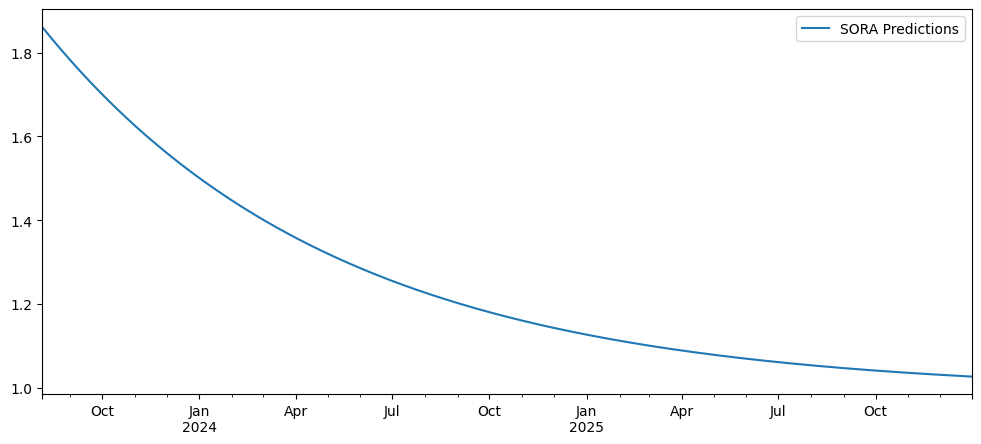

In [20]:
pred.plot(figsize=(12,5), legend=True)